# AFM analisis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Latin Modern Roman"],  # must be installed on your system
    "mathtext.fontset": "cm",             # Computer Modern math, matches LaTeX style
    "text.usetex": True                    # render text via LaTeX
})

In [2]:
# # cTLM Ni 16.01.2026 Struktur 7-1 TLM 15um 200mV
# file_path_topography = r"H:\Seafile\Master\Data\AFM\2026-01-16_cTLM_01\relevant\20251216_Strucktur_7-1_TLM_15um_200mV_Topography.txt"
# file_path_retracecurrent = r"H:\Seafile\Master\Data\AFM\2026-01-16_cTLM_01\relevant\20251216_Strucktur_7-1_TLM_15um_200mV_Retrace_Current_flat.txt"

# Valencia-9 p Struktur 5-3
file_path_topography = r"H:\Seafile\Master\Data\AFM\2025-12-11_Valencia\relevant\Valencia-p_Struktur-5-3_topograhy.txt"
file_path_current = r"H:\Seafile\Master\Data\AFM\2025-12-11_Valencia\relevant\Valencia-p_Struktur-5-3_current.txt"

# Valencia-9 n Struktur 6-2
# file_path_topography = r"H:\Seafile\Master\Data\AFM\2025-12-08_ValenciaTests\relevant\Valencia-n_Struktur-6-2_Topography.txt"
# file_path_retracecurrent = r"H:\Seafile\Master\Data\AFM\2025-12-08_ValenciaTests\relevant\Valencia-n_Struktur-6-2_RetraceCurrent.txt"
# file_path_current = r"H:\Seafile\Master\Data\AFM\2025-12-08_ValenciaTests\relevant\Valencia-n_Struktur-6-2_Current.txt"

topography_array = np.loadtxt(file_path_topography, delimiter=None)
current_array = np.loadtxt(file_path_current, delimiter=None)
# RetraceCurrent_array = np.loadtxt(file_path_retracecurrent, delimiter=None)

In [3]:
physical_width = 40   # x in µm
physical_height = 40  # y in µm

ny, nx = topography_array.shape

x_1d = np.linspace(0, physical_width, nx)
y_1d = np.linspace(0, physical_height, ny)

X, Y = np.meshgrid(x_1d, y_1d)

### cTLM_01 Ni

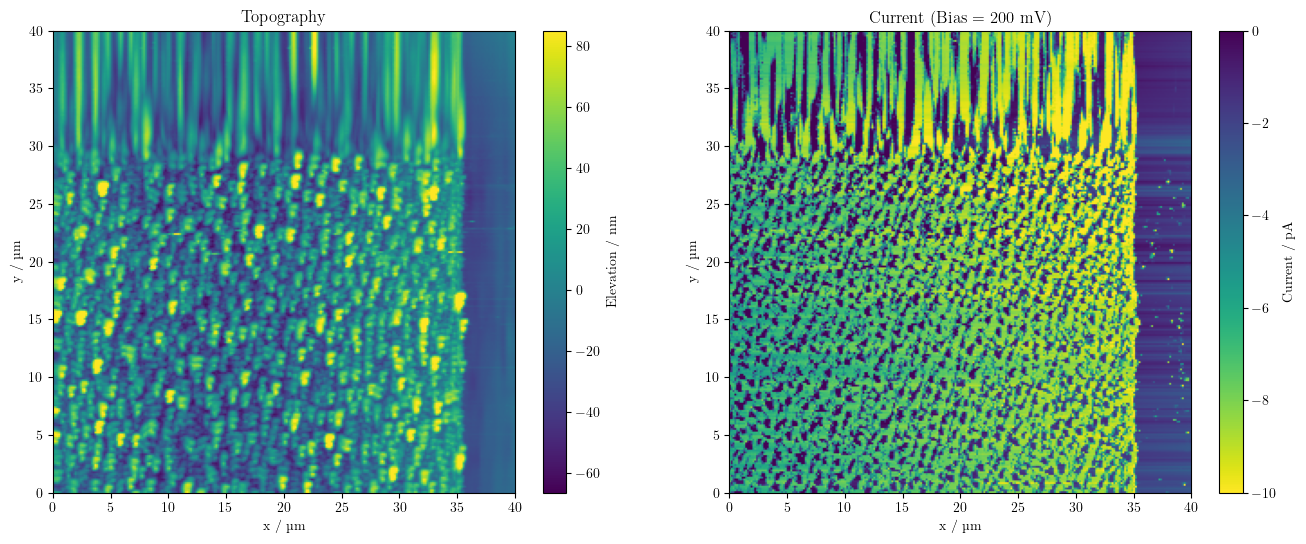

In [ ]:
# fig = plt.figure(figsize=(16,6))
# ax1 = fig.add_subplot(1,2,1)
# # remove top 1% from colorbar for better contrast
# vmax = np.percentile(topography_array, 99)   # ignore top 1%
# # vmin = np.percentile(topography_array, 1)    # optional

# topography = ax1.imshow(topography_array, cmap='viridis', extent=[0, physical_width, 0, physical_height],vmax=vmax)
# cbar1 = plt.colorbar(topography, ax=ax1, fraction=0.045, pad=0.05)   # fraction=0.05, pad=0.05
# cbar1.set_label('Elevation / nm')
# ax1.set_title("Topography")
# ax1.set_xlabel("x / µm")
# ax1.set_ylabel("y / µm")


# ax2 = fig.add_subplot(1,2,2)
# current = ax2.imshow(RetraceCurrent_array, cmap='viridis_r', extent=[0, physical_width, 0, physical_height], vmax=0, vmin=-10)  # plasma inferno Spectral viridis magma
# cbar2 = plt.colorbar(current, ax=ax2, fraction=0.045, pad=0.05)
# cbar2.set_label('Current / pA')
# ax2.set_title("Current (Bias = 200 mV)")
# ax2.set_xlabel("x / µm")
# ax2.set_ylabel("y / µm")
# plt.show()
# # plt.savefig('../Images/cTLM_Ni_AFM.pdf', dpi=1000)

### Valencia-9 p Struktur 5-3

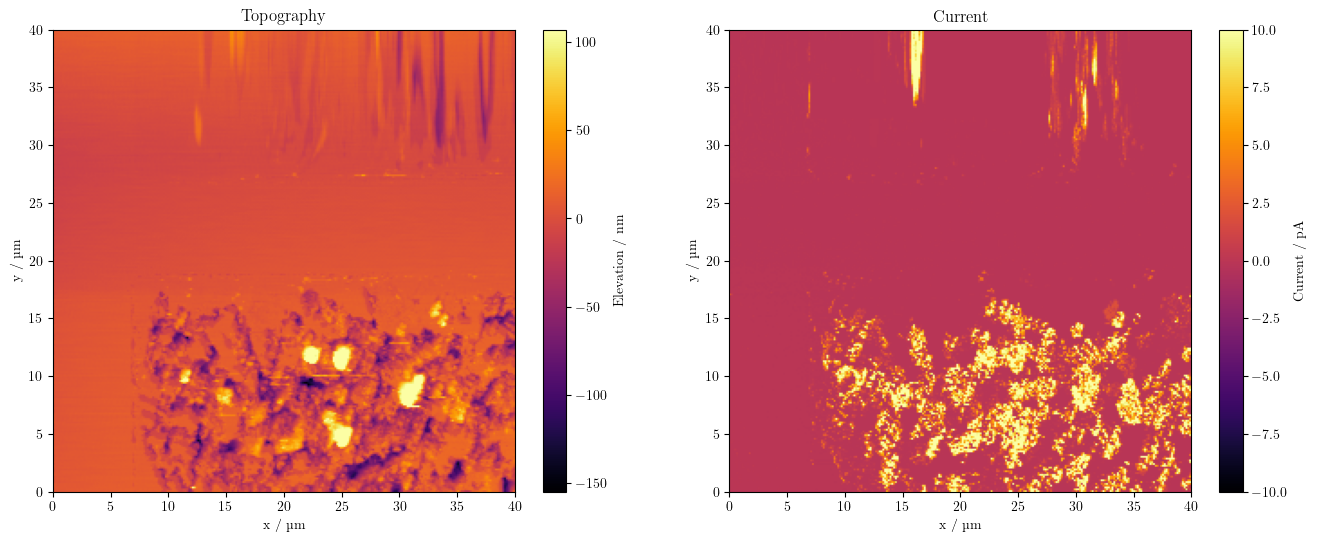

In [10]:
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1,2,1)
# remove top 1% from colorbar for better contrast
vmax = np.percentile(topography_array, 99.5)   # ignore top 0,5%
# vmin = np.percentile(topography_array, 1)    # optional

topography = ax1.imshow(topography_array, cmap='inferno', extent=[0, physical_width, 0, physical_height],vmax=vmax)
cbar1 = plt.colorbar(topography, ax=ax1, fraction=0.045, pad=0.05)   # fraction=0.05, pad=0.05
cbar1.set_label('Elevation / nm')
ax1.set_title("Topography")
ax1.set_xlabel("x / µm")
ax1.set_ylabel("y / µm")


ax2 = fig.add_subplot(1,2,2)
current = ax2.imshow(current_array, cmap='inferno', extent=[0, physical_width, 0, physical_height], vmax=10, vmin=-10)  # plasma inferno Spectral viridis magma
cbar2 = plt.colorbar(current, ax=ax2, fraction=0.045, pad=0.05)
cbar2.set_label('Current / pA')
ax2.set_title("Current")
ax2.set_xlabel("x / µm")
ax2.set_ylabel("y / µm")
plt.show()
# plt.savefig('../Images/Valencia_p_Struktur_5-3.pdf', dpi=1000)

FFT / image processing endge detection?

scatter plot using topograpy vs. current

=> limit this analysis to the contact area only !!!

In [27]:
x_min, x_max = 7, 40
y_min, y_max = 20, 40

rows = np.where((y_1d >= y_min) & (y_1d <= y_max))[0]
cols = np.where((x_1d >= x_min) & (x_1d <= x_max))[0]

# Slice the data using the min/max of those indices
contact_area_topo = topography_array[rows.min():rows.max()+1, cols.min():cols.max()+1]
contact_area_current = current_array[rows.min():rows.max()+1, cols.min():cols.max()+1]
X_boxed = X[rows.min():rows.max()+1, cols.min():cols.max()+1]
Y_boxed = Y[rows.min():rows.max()+1, cols.min():cols.max()+1]


C:\Users\lhager\AppData\Local\Temp\ipykernel_892\2860058464.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scatter_data_filtered['Topography_bin'] = pd.qcut(scatter_data_filtered['Topography'], q=50)  # qcut = Quantile-based => bins are of equal size
C:\Users\lhager\AppData\Local\Temp\ipykernel_892\2860058464.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = (scatter_data_filtered.groupby("Topography_bin")["Current"].agg(["mean", "median", "std", "count"]))


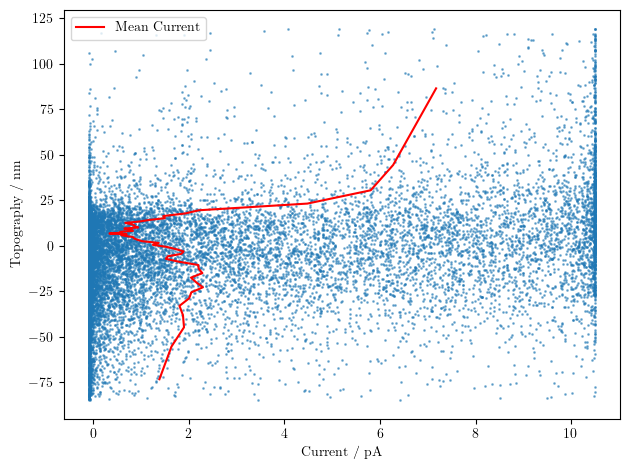

In [29]:
# cenvert 2D array to 1D list for scatter plot
current_list = contact_area_current.flatten()
topography_list = contact_area_topo.flatten()

scatter_data = pd.DataFrame({
    'Current': current_list,
    'Topography': topography_list
})

# filter out top and bottom 1% of topography data for better visibility
low, high = scatter_data["Topography"].quantile([0.01, 0.99])
scatter_data_filtered = scatter_data[(scatter_data["Topography"] >= low) & (scatter_data["Topography"] <= high)]

current_filtered = scatter_data_filtered["Current"].tolist()
topography_filtered = scatter_data_filtered["Topography"].tolist()

# use binns of the topography to see trends in the current
# scatter_data_filtered['Topography_bin'] = pd.cut(scatter_data_filtered['Topography'], bins=50)
scatter_data_filtered['Topography_bin'] = pd.qcut(scatter_data_filtered['Topography'], q=50)  # qcut = Quantile-based => bins are of equal size
stats = (scatter_data_filtered.groupby("Topography_bin")["Current"].agg(["mean", "median", "std", "count"]))
y_centers = stats.index.map(lambda x: x.mid)


# plotting
fig, ax = plt.subplots()
ax.scatter(current_filtered, topography_filtered, s=1, alpha=0.5, )
plt.plot(stats["mean"], y_centers, label="Mean Current", color='red')

ax.set_xlabel("Current / pA")
ax.set_ylabel("Topography / nm")
plt.legend()
plt.tight_layout()
plt.show()

In [32]:
# df = scatter_data_filtered[scatter_data_filtered["Current"] > 0.1]
# plt.figure()

# hb = plt.hexbin(
#     df["Current"],
#     df["Topography"],
#     gridsize=50,
#     mincnt=1,
#     # vmax=300,
# )

# plt.colorbar(hb, label="Counts")

# plt.xlabel("Current / pA")
# plt.ylabel("Topography / nm")
# plt.tight_layout()
# plt.show()

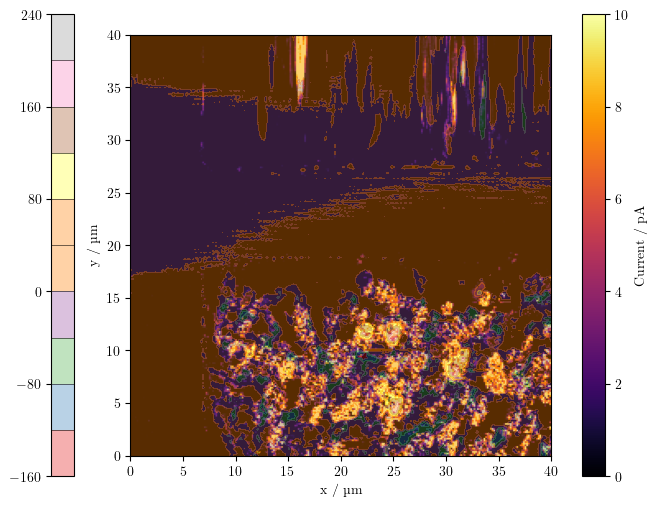

In [ ]:
from matplotlib.colors import LogNorm
fig, ax = plt.subplots(figsize=(8,6))

# current_array_masked = np.ma.masked_where(current_array < 0.01, current_array)
im = ax.imshow(current_array, cmap="inferno", extent=[0, physical_width, 0, physical_height], vmin=0,  vmax=10) # norm=LogNorm(vmin=1e-3, vmax=Z_curr.max())

cbar = plt.colorbar(im, ax=ax, fraction=0.045, pad=0.05)
cbar.set_label("Current / pA")

# remove top and bottom 1% from topography
# low, high = np.percentile(topography_array, [1, 99])
# filtered_topography = np.where((topography_array >= low) & (topography_array <= high), topography_array, 0)   #  np.nan or 0, or masked array

levels = 15  # number of contour lines
# contour = ax.contour(X, Y, np.flipud(topography_array), levels=levels, colors="w", linewidths=0.6)
cs = ax.contourf(X, Y, np.flipud(topography_array), levels=10, alpha=0.35, cmap="Set1")
cbar2 = plt.colorbar(cs, ax=ax, drawedges=True, location='left')
ax.set_xlabel("x / µm")
ax.set_ylabel("y / µm")
plt.show()
# plt.savefig('../Images/Valencia_p_Struktur_Contours.pdf', dpi=500)

### Valencia-9 n Struktur 6-2

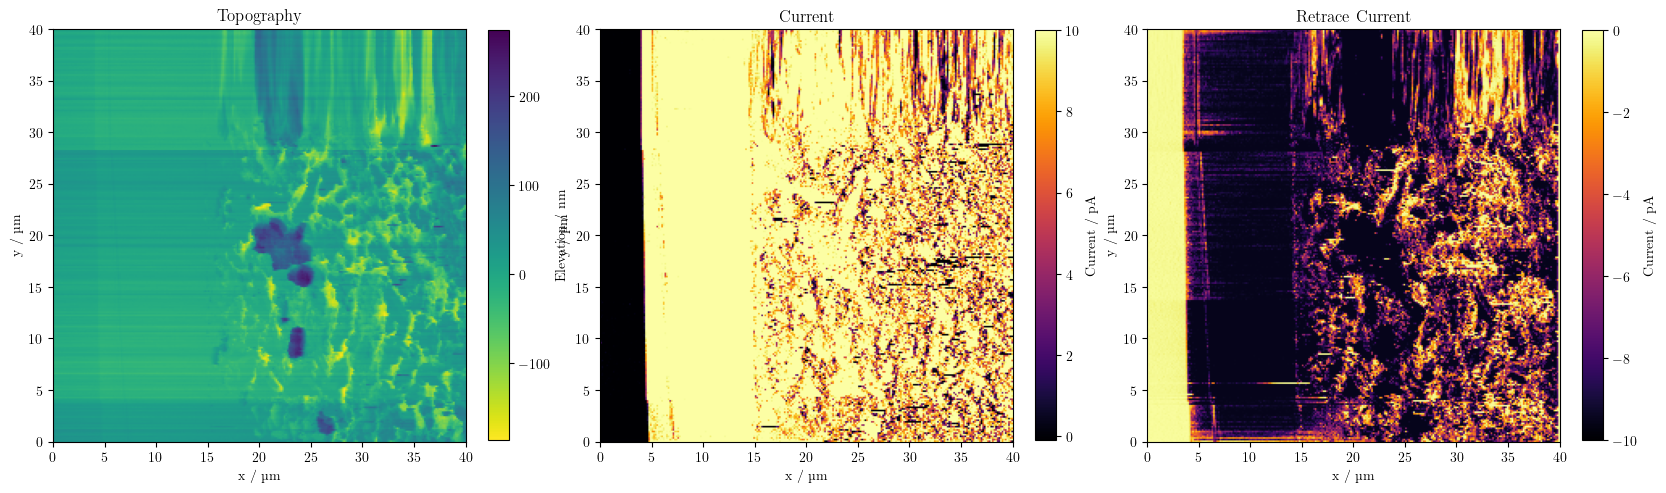

In [ ]:
# fig = plt.figure(figsize=(20,6))
# ax1 = fig.add_subplot(1,3,1)
# # remove top 1% from colorbar for better contrast
# # vmax = np.percentile(topography_array, 99)   # ignore top 1%
# # vmin = np.percentile(topography_array, 1)    # optional

# topography = ax1.imshow(topography_array, cmap='viridis_r', extent=[0, physical_width, 0, physical_height])   # ,vmax=vmax
# cbar1 = plt.colorbar(topography, ax=ax1, fraction=0.045, pad=0.05)   # fraction=0.05, pad=0.05
# cbar1.set_label('Elevation / nm')
# ax1.set_title("Topography")
# ax1.set_xlabel("x / µm")
# ax1.set_ylabel("y / µm")


# RetraceCurrent_array_2 = RetraceCurrent_array.copy()
# RetraceCurrent_array_2[X < 14] = 0

# current_array_2 = current_array.copy()
# current_array_2[X < 14] = 0


# ax2 = fig.add_subplot(1,3,2)
# current = ax2.imshow(current_array, cmap='inferno', extent=[0, physical_width, 0, physical_height], vmax=0, vmin=10)  # plasma inferno Spectral viridis magma
# cbar2 = plt.colorbar(current, ax=ax2, fraction=0.045, pad=0.05)
# cbar2.set_label('Current / pA')
# ax2.set_title("Current")
# ax2.set_xlabel("x / µm")
# ax2.set_ylabel("y / µm")


# ax2 = fig.add_subplot(1,3,3)
# retrace_current = ax2.imshow(RetraceCurrent_array, cmap='inferno', extent=[0, physical_width, 0, physical_height], vmax=0, vmin=-10)  # plasma inferno Spectral viridis magma
# cbar2 = plt.colorbar(retrace_current, ax=ax2, fraction=0.045, pad=0.05)
# cbar2.set_label('Current / pA')
# ax2.set_title("Retrace Current")
# ax2.set_xlabel("x / µm")
# ax2.set_ylabel("y / µm")

# plt.show()
# # plt.savefig('../Images/Valencia_p_Struktur_5-3.pdf', dpi=1000)

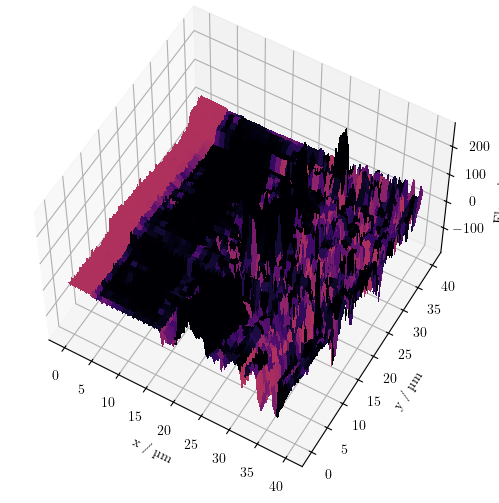

In [ ]:
# fig = plt.figure(figsize=(10,6))
# ax = fig.add_subplot(111, projection='3d')

# norm = plt.Normalize(RetraceCurrent_array.min(), RetraceCurrent_array.max())
# colors = plt.cm.inferno(norm(RetraceCurrent_array))

# surf = ax.plot_surface(X, Y, topography_array, facecolors=colors, shade=False, linewidth=0, antialiased=False)
# # fig.colorbar(colors, fraction=0.045, pad=0.05)
# ax.view_init(elev=55.)
# ax.set_xlabel('x / µm')
# ax.set_ylabel('y / µm')
# ax.set_zlabel('Elevation / nm')
# plt.show()

### combine topography with current colormap

In [ ]:
def process_topograhy_data(topography):
    # Destriping (Line Flattening)
    topo_flattened = topography - np.median(topography, axis=1, keepdims=True)
    
    # Smooth the Topography by applaying a filter
    topo_smooth = gaussian_filter(topo_flattened, sigma=1)

    return topo_smooth

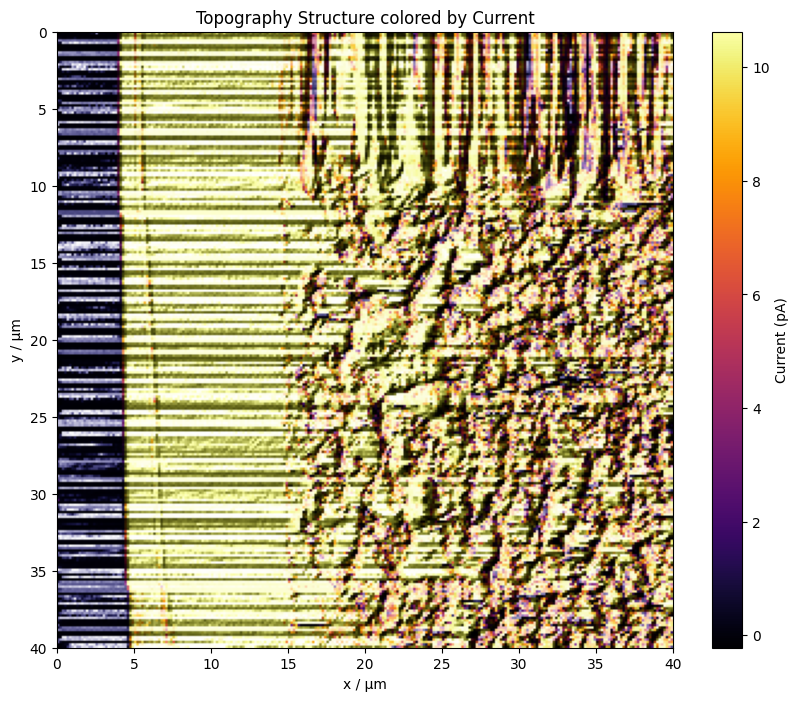

In [ ]:
from matplotlib.colors import LightSource, Normalize
# convert current array to colormap
# Normalize the current data to 0.0 - 1.0
# vmin/vmax clip the outliers so the weak currents are still visible
norm = Normalize(vmin=current_array.min(), vmax=np.percentile(current_array, 99)) # Using 99th percentile clips extreme hot spots
cmap = plt.cm.inferno 
current_rgb = cmap(norm(current_array))

# LightSource creates the 3D shadow effect
ls = LightSource(azdeg=315, altdeg=45)

final_image = ls.shade_rgb(current_rgb, elevation=topography_array)    #  vert_exag=0.5, blend_mode='overlay'

# # hide pixels where topography is between -5 and 5 => declutter topography
# hidden_mask = (topography_array > -20) & (topography_array < 20)
# # final_image is an array of shape (Height, Width, 4) -> (R, G, B, Alpha)
# # 4th channel (index 3) set it to 0 (transparent)
# final_image[hidden_mask, 3] = 0.0

fig, ax = plt.subplots(figsize=(10, 8))

im = ax.imshow(final_image, origin='upper', extent=[0, physical_width, physical_height, 0])

cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('Current (pA)')

ax.set_title("Topography Structure colored by Current")
ax.set_xlabel("x / µm")
ax.set_ylabel("y / µm")

plt.show()

### use current and reverse current to identify ohmic beahaviour
-> check if current is roughly the same absolute value using the negative and positiv bias values

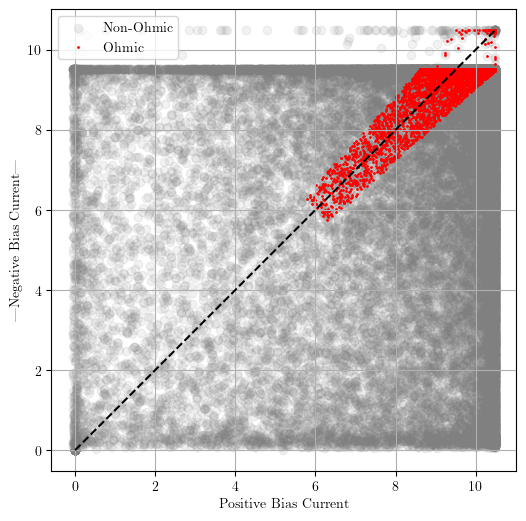

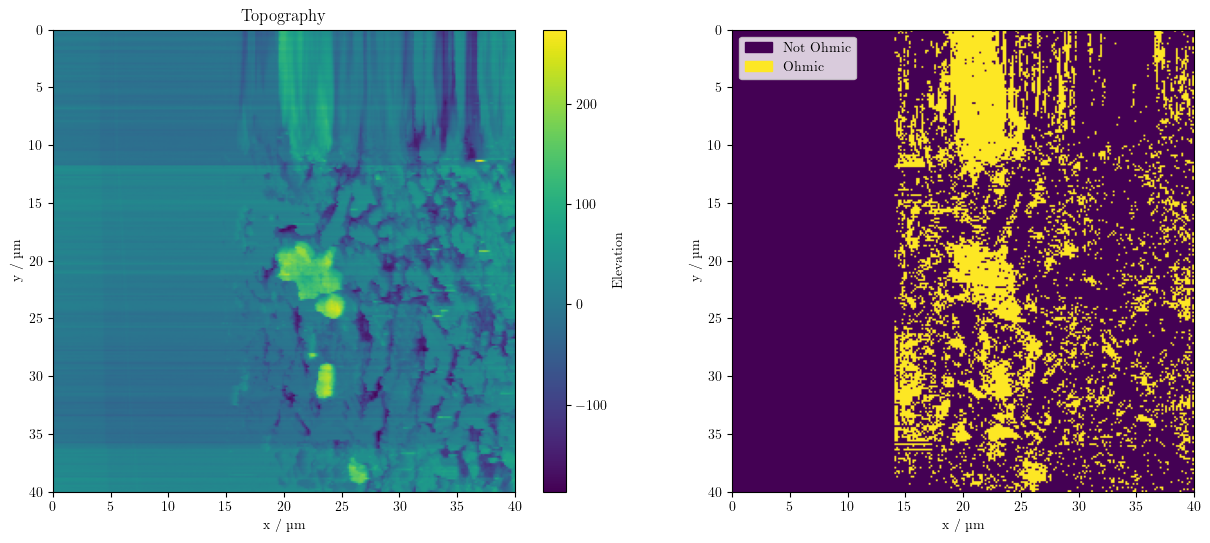

In [60]:
# current_delta = current_array - abs(RetraceCurrent_array)
# print(current_delta)

pos_current = current_array_2
neg_current_abs = np.abs(RetraceCurrent_array_2)

# NOISE_FLOOR: If current is below this (e.g., 2 pA), its considered insulating/noise
# TOLERANCE: The allowed relative difference (0.2 = 20% difference allowed)
NOISE_FLOOR = 6
TOLERANCE = 0.1

# avg_current = (current_array_2 + RetraceCurrent_array_2) / 2.0
avg_current = (pos_current + neg_current_abs) / 2

rel_diff = np.abs(pos_current - neg_current_abs) / (avg_current + 1e-12)    # add tiniy value to avoid dividing by zero

is_conducting = avg_current > NOISE_FLOOR
is_symmetric = rel_diff < TOLERANCE

# combine conditions to create ahmic mask
ohmic_mask = is_conducting & is_symmetric


# Test plot to show ohmic behaviour is actually recognized
plt.figure(figsize=(6,6))
# Plot ALL points in gray
plt.scatter(pos_current.flatten(), neg_current_abs.flatten(), c='gray', alpha=0.1, label='Non-Ohmic')
# Plot OHMIC points in red (using your new mask)
plt.scatter(pos_current[ohmic_mask], neg_current_abs[ohmic_mask], c='red', s=1, label='Ohmic')
# Draw the perfect 1:1 line
max_val = max(pos_current.max(), neg_current_abs.max())
plt.plot([0, max_val], [0, max_val], 'k--')
plt.xlabel("Positive Bias Current")
plt.ylabel("|Negative Bias Current|")
plt.legend()
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1,2,1)
topography = ax1.imshow(topography_array, cmap='viridis', extent=[0, physical_width, physical_height, 0])
cbar1 = plt.colorbar(topography, ax=ax1, fraction=0.045, pad=0.05)   # fraction=0.05, pad=0.05
cbar1.set_label('Elevation')
ax1.set_title("Topography")
ax1.set_xlabel("x / µm")
ax1.set_ylabel("y / µm")

ax2 = fig.add_subplot(1,2,2)
im = ax2.imshow(ohmic_mask, origin='upper', extent=[0, physical_width, physical_height, 0], cmap='viridis')


colors = [im.cmap(im.norm(0)), im.cmap(im.norm(1))]
# Create the legend handles
labels = ["Not Ohmic", "Ohmic"]
import matplotlib.patches as mpatches
patches = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(len(labels))]

# Put the legend outside the plot
plt.legend(handles=patches, loc='upper left')
ax2.set_xlabel("x / µm")
ax2.set_ylabel("y / µm")
plt.show()